In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn_master_df = pd.read_csv("/Users/harshil/Desktop/churn_data_st.csv")

In [3]:
churn_df = churn_master_df.copy()

In [5]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
ServiceCount        7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7016 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [7]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  10

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


### Null Hypothesis - There is no relationship between two categorical values

### Alternate Hypothesis - There is a relationship between the two categorical values - 95% above CI

## Questions we are going to answer through statistical test

###### Is there any relationship between user who have Churned to Gender of the user?

###### Is there any relationship between users who have opted for paperless billing to user who have churned?

In [14]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

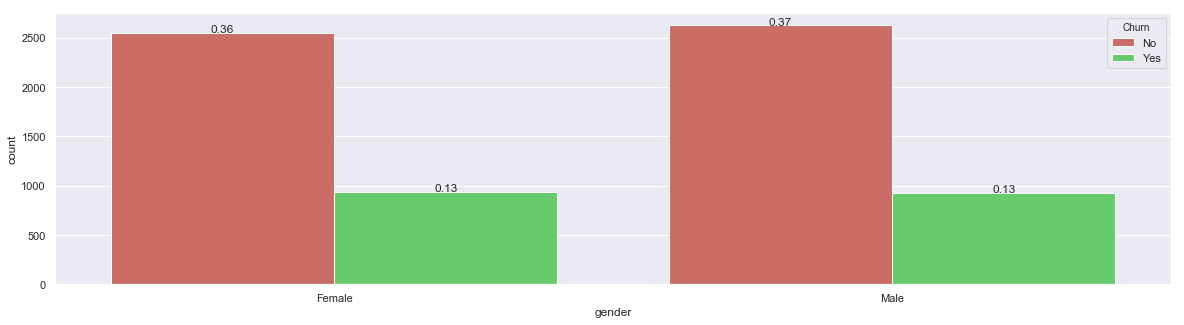

In [15]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="gender", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [16]:
gender_churn_ct=pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'])

In [17]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [30]:
gender_churn_ct.iloc[0].values

array([2549,  939])

In [20]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([gender_churn_ct.iloc[0].values,gender_churn_ct.iloc[1].values])

In [21]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  0.4840828822091383
p-value  :  0.48657873605618596
Degree for Freedom :  1


In [22]:
pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


### Is there any relationship between users who have opted for paperless billing to user who have churned?

In [23]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

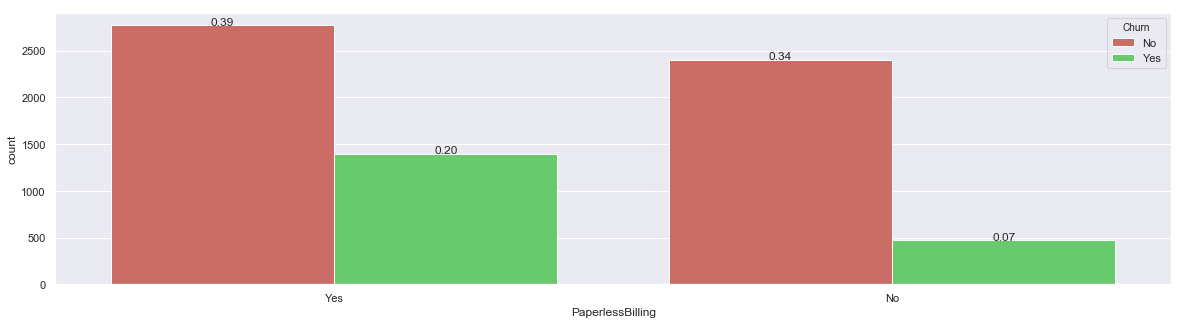

In [24]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [25]:
pb_churn_ct=pd.crosstab(index=churn_df['PaperlessBilling'],columns=churn_df['Churn'])

In [26]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [27]:
pb_churn_ct.iloc[0].values

array([2403,  469])

In [28]:
(chi2, p, dof,_) = stats.chi2_contingency([pb_churn_ct.iloc[0].values,pb_churn_ct.iloc[1].values])

In [29]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  258.27764906707307
p-value  :  4.073354668665985e-58
Degree for Freedom :  1
